# 1

In [4]:
def fib(n):
  if n == 0:
    return "0"
  elif n == 1:
    return "01"
  
  prevprev = "0"
  prev = "01"
  newstr = "".join([prev, prevprev])
  for i in range(2, n):
    prevprev = prev
    prev = newstr
    newstr = "".join([prev, prevprev])
  
  return newstr

In [5]:
fib(1)

'01'

In [6]:
fib(3)

'01001'

In [7]:
for x in range(10):
  print(f"S{x} = {fib(x)}")

S0 = 0
S1 = 01
S2 = 010
S3 = 01001
S4 = 01001010
S5 = 0100101001001
S6 = 010010100100101001010
S7 = 0100101001001010010100100101001001
S8 = 0100101001001010010100100101001001010010100100101001010
S9 = 01001010010010100101001001010010010100101001001010010100100101001001010010100100101001001


# 2

In [9]:
def seq_count(seq, idx = 0, prevElem = None, count = 0, highestCount = 0):
  if idx == len(seq):
    # take the highest of the current count and the global highest
    return max(count, highestCount)
  elif idx == 0:
    # start the recursion
    return seq_count(seq, 1, seq[0], 1, 1)
  
  if prevElem == seq[idx]:
    # add a count
    return seq_count(seq, idx + 1, seq[idx], count + 1, highestCount)
  else:
    # start a new count
    highestCount = max(count, highestCount)
    return seq_count(seq, idx + 1, seq[idx], 1, highestCount)

In [10]:
seq_count([1, 3, 1, 1, 3, 3, 4, 4, 4])

3

In [11]:
seq_count((1, 3, 1, 1, 1, '1', 1, [3, 3, 3, 3], 3, 4, 0))

3

In [12]:
seq_count([[1], [1], [1], 1, 3, 3, 2, 3, 3, 3, 3, 2, 4, 0])

4

In [13]:
seq_count(('G', 'g', 'a', "a", '''a''', 2, 's', 's'))

3

In [14]:
seq_count([3, 1, int(True), 1, 1, 2, 3, 3])

4

In [15]:
seq_count((1, 3, None, 3, 3, 1, 3, 3, 4, 0))

2

In [23]:
# brute force
def pattern_count(seq, pattern, idx = 0, maxCount = 0):
  if idx == len(seq):
    return maxCount
  
  # do calculation starting from this idx
  i, j = idx, 0
  count = 0
  while i < len(seq) and seq[i] == pattern[j]:
    i += 1
    j = (j + 1) % len(pattern)
    if j == 0:
      # we have cycled through all elements in the pattern
      count += 1

  maxCount = max(count, maxCount)
  return pattern_count(seq, pattern, idx + 1, maxCount)

In [24]:
pattern_count([0, 1, 2, 1, 2, 3, 1, 2, 1, 2, 1, 2, 4, 1, 2], (1, 2))

3

In [25]:
pattern_count([], [2])

0

In [26]:
pattern_count(['ab', 'ab', 'a', 'a', 'b'], 'ab')

1

In [27]:
pattern_count('CGGACTACTAGACT', 'ACT')

2

In [28]:
pattern_count((1, (1, 1, 1, 1), 2, 1, 1, 1), [1, 1])

1

In [29]:
pattern_count(['ab', 'ab', 'a', 'a', 'b'], ('ab',))

2

# 3

#### (a)

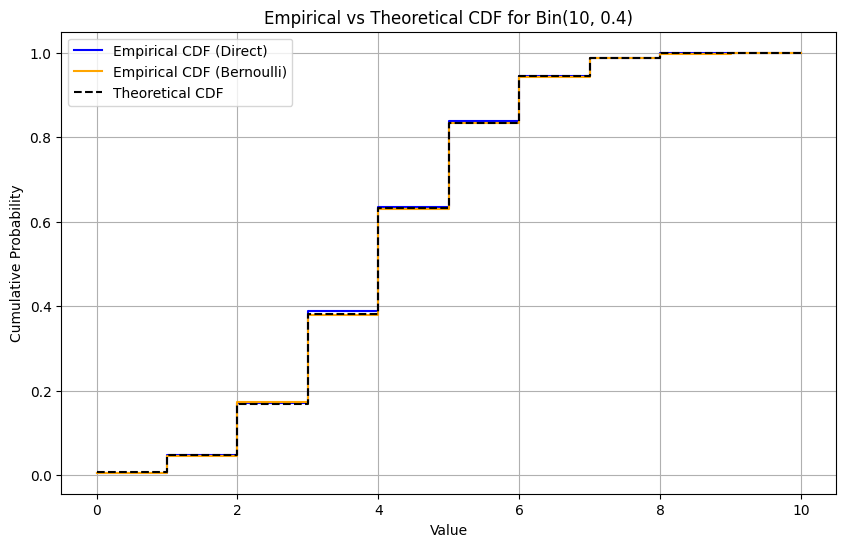

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# (a) (i)
n, p, size = 10, 0.4, 10000
samples_direct = binom.ppf(np.random.uniform(0, 1, size), n, p)

# (a) (ii)
bernoulli_samples = np.random.binomial(1, p, size=(size, n))
samples_bernoulli = np.sum(bernoulli_samples, axis=1)

# (a) (iii)
x = np.arange(0, n + 1)
theoretical_cdf = binom.cdf(x, n, p)

empirical_cdf_direct = [np.mean(samples_direct <= val) for val in x]
empirical_cdf_bernoulli = [np.mean(samples_bernoulli <= val) for val in x]

plt.figure(figsize=(10, 6))
plt.step(x, empirical_cdf_direct, where='post', label='Empirical CDF (Direct)', color='blue')
plt.step(x, empirical_cdf_bernoulli, where='post', label='Empirical CDF (Bernoulli)', color='orange')
plt.step(x, theoretical_cdf, where='post', label='Theoretical CDF', color='black', linestyle='--')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.title('Empirical vs Theoretical CDF for Bin(10, 0.4)')
plt.legend()
plt.grid()
plt.show()

#### (b)

Estimated Acceptance Probability: 0.6542
Theoretical Acceptance Probability: 0.6578


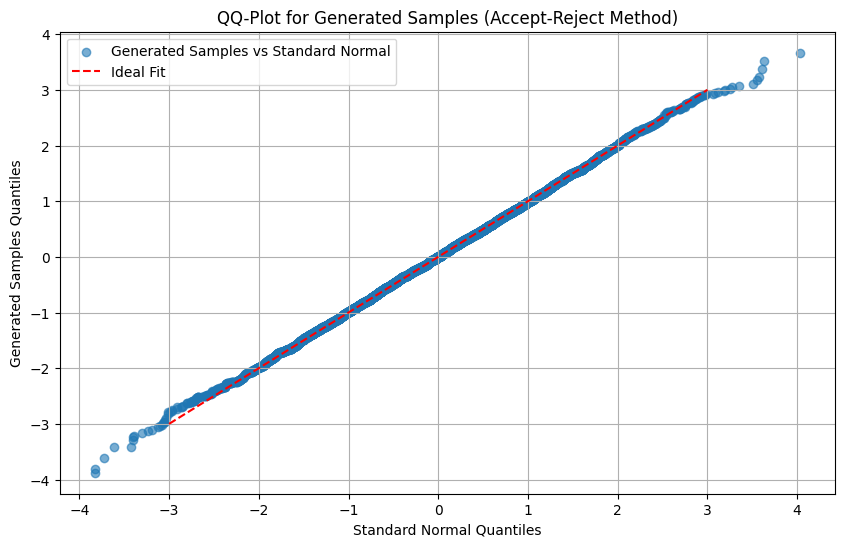

In [3]:
from scipy.stats import cauchy, norm

# (b) (i) Determine the optimal scaling factor c
x = np.linspace(-10, 10, 1000)
cauchy_pdf = cauchy.pdf(x)
normal_pdf = norm.pdf(x)
c = np.max(normal_pdf / cauchy_pdf)

# (b) (ii) Generate samples using accept-reject method
n_samples = 10000
samples = []
iterations = 0  # Track total iterations

while len(samples) < n_samples:
    # Generate candidate samples from the Cauchy distribution
    candidate_samples = cauchy.rvs(size=n_samples - len(samples))
    
    # Accept or reject based on scaling factor
    u = np.random.uniform(0, 1, size=n_samples - len(samples))
    accept = u < (norm.pdf(candidate_samples) / (c * cauchy.pdf(candidate_samples)))
    samples.extend(candidate_samples[accept])
    iterations += len(candidate_samples)  # Increment iterations

samples = np.array(samples)

# (b) (iii) Compare estimated and theoretical acceptance probabilities
acceptance_probability_estimated = n_samples / iterations
acceptance_probability_theoretical = 1 / c
print(f"Estimated Acceptance Probability: {acceptance_probability_estimated:.4f}")
print(f"Theoretical Acceptance Probability: {acceptance_probability_theoretical:.4f}")

# (b) (iv) Generate QQ-plot
plt.figure(figsize=(10, 6))
norm_samples = norm.rvs(size=n_samples)
plt.scatter(np.sort(norm_samples), np.sort(samples), alpha=0.6, label='Generated Samples vs Standard Normal')
plt.plot([-3, 3], [-3, 3], 'r--', label='Ideal Fit')
plt.xlabel('Standard Normal Quantiles')
plt.ylabel('Generated Samples Quantiles')
plt.title('QQ-Plot for Generated Samples (Accept-Reject Method)')
plt.legend()
plt.grid()
plt.show()


# 4

In [2]:
import pandas as pd

In [103]:
county_age_dist = pd.read_csv("county_age_dist.csv")
fips_state = pd.read_csv("fips_state.csv", delimiter=';')
fips_county = pd.read_csv("fips_county.csv")

#### (a)

In [104]:
county_age_dist.head()

,fips,0-17,18-24,25-34,35-44,45-54,55-64,65-74,75-84,85+
0,1001,25941,11422,12315,13828,14000,12697,9594,5430,1945
1,1003,86587,37568,44133,46730,49675,52405,43252,23262,8854
2,1005,11057,6162,6603,5907,6490,6377,5255,2795,1074
3,1007,9671,5241,5788,5472,6707,5563,4270,2555,638
4,1009,25671,11360,12635,13570,14737,14123,12106,6560,2022


In [105]:
fips_county.head()

,fips,name,info
0,01000,Alabama,NaN
1,01001,Autauga County,NaN
2,01003,Baldwin County,NaN
3,01005,Barbour County,NaN
4,01007,Bibb County,NaN


In [106]:
fips_county['fips'] = pd.to_numeric(fips_county['fips'], errors='coerce')

In [107]:
fips_county = fips_county.dropna(subset=['fips'])

In [108]:
fips_county['fips'] = fips_county['fips'].astype('int64')

In [109]:
fips_county.head()

,fips,name,info
0,1000,Alabama,NaN
1,1001,Autauga County,NaN
2,1003,Baldwin County,NaN
3,1005,Barbour County,NaN
4,1007,Bibb County,NaN


In [110]:
data = pd.merge(county_age_dist, fips_county, on="fips")

In [111]:
data.head()

,fips,0-17,18-24,25-34,35-44,45-54,55-64,65-74,75-84,85+,name,info
0,1001,25941,11422,12315,13828,14000,12697,9594,5430,1945,Autauga County,NaN
1,1003,86587,37568,44133,46730,49675,52405,43252,23262,8854,Baldwin County,NaN
2,1005,11057,6162,6603,5907,6490,6377,5255,2795,1074,Barbour County,NaN
3,1007,9671,5241,5788,5472,6707,5563,4270,2555,638,Bibb County,NaN
4,1009,25671,11360,12635,13570,14737,14123,12106,6560,2022,Blount County,NaN


In [112]:
fips_state.head()

,FIPS,STATE
0,1,ALABAMA
1,2,ALASKA
2,4,ARIZONA
3,5,ARKANSAS
4,6,CALIFORNIA


In [113]:
data['state_fips'] = data['fips'] // 1000

In [114]:
data.head()

,fips,0-17,18-24,25-34,35-44,45-54,55-64,65-74,75-84,85+,name,info,state_fips
0,1001,25941,11422,12315,13828,14000,12697,9594,5430,1945,Autauga County,NaN,1
1,1003,86587,37568,44133,46730,49675,52405,43252,23262,8854,Baldwin County,NaN,1
2,1005,11057,6162,6603,5907,6490,6377,5255,2795,1074,Barbour County,NaN,1
3,1007,9671,5241,5788,5472,6707,5563,4270,2555,638,Bibb County,NaN,1
4,1009,25671,11360,12635,13570,14737,14123,12106,6560,2022,Blount County,NaN,1


In [115]:
data = pd.merge(data, fips_state, left_on="state_fips", right_on="FIPS", how="inner")

In [116]:
data.head()

,fips,0-17,18-24,25-34,35-44,45-54,55-64,65-74,75-84,85+,name,info,state_fips,FIPS,STATE
0,1001,25941,11422,12315,13828,14000,12697,9594,5430,1945,Autauga County,NaN,1,1,ALABAMA
1,1003,86587,37568,44133,46730,49675,52405,43252,23262,8854,Baldwin County,NaN,1,1,ALABAMA
2,1005,11057,6162,6603,5907,6490,6377,5255,2795,1074,Barbour County,NaN,1,1,ALABAMA
3,1007,9671,5241,5788,5472,6707,5563,4270,2555,638,Bibb County,NaN,1,1,ALABAMA
4,1009,25671,11360,12635,13570,14737,14123,12106,6560,2022,Blount County,NaN,1,1,ALABAMA


In [117]:
data = data.rename(columns=lambda x: x.strip().capitalize())
data.head()

,Fips,0-17,18-24,25-34,35-44,45-54,55-64,65-74,75-84,85+,Name,Info,State_fips,Fips,State
0,1001,25941,11422,12315,13828,14000,12697,9594,5430,1945,Autauga County,NaN,1,1,ALABAMA
1,1003,86587,37568,44133,46730,49675,52405,43252,23262,8854,Baldwin County,NaN,1,1,ALABAMA
2,1005,11057,6162,6603,5907,6490,6377,5255,2795,1074,Barbour County,NaN,1,1,ALABAMA
3,1007,9671,5241,5788,5472,6707,5563,4270,2555,638,Bibb County,NaN,1,1,ALABAMA
4,1009,25671,11360,12635,13570,14737,14123,12106,6560,2022,Blount County,NaN,1,1,ALABAMA


In [118]:
data = data.drop(columns=['Info'])
data.head()

,Fips,0-17,18-24,25-34,35-44,45-54,55-64,65-74,75-84,85+,Name,State_fips,Fips,State
0,1001,25941,11422,12315,13828,14000,12697,9594,5430,1945,Autauga County,1,1,ALABAMA
1,1003,86587,37568,44133,46730,49675,52405,43252,23262,8854,Baldwin County,1,1,ALABAMA
2,1005,11057,6162,6603,5907,6490,6377,5255,2795,1074,Barbour County,1,1,ALABAMA
3,1007,9671,5241,5788,5472,6707,5563,4270,2555,638,Bibb County,1,1,ALABAMA
4,1009,25671,11360,12635,13570,14737,14123,12106,6560,2022,Blount County,1,1,ALABAMA


In [119]:
for col in data.columns:
  data[col] = data[col].map(lambda x: x.strip() if isinstance(x, str) else x)
data.head(4)

,Fips,0-17,18-24,25-34,35-44,45-54,55-64,65-74,75-84,85+,Name,State_fips,Fips,State
0,1001,25941,11422,12315,13828,14000,12697,9594,5430,1945,Autauga County,1,1,ALABAMA
1,1003,86587,37568,44133,46730,49675,52405,43252,23262,8854,Baldwin County,1,1,ALABAMA
2,1005,11057,6162,6603,5907,6490,6377,5255,2795,1074,Barbour County,1,1,ALABAMA
3,1007,9671,5241,5788,5472,6707,5563,4270,2555,638,Bibb County,1,1,ALABAMA


#### (b)

In [120]:
def calculate_proportions(row):
    total_pop = sum([row[f"{age_group}"] for age_group in ["0-17", "18-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75-84", "85+"]])
    cpe = sum([row["65-74"], row["75-84"], row["85+"]]) / total_pop
    cpy = sum([row["0-17"], row["18-24"]]) / total_pop
    return pd.Series({"CPY": cpy, "CPE": cpe})

proportions = data.apply(calculate_proportions, axis=1)
data = pd.concat([data, proportions], axis=1)

# View first 4 rows as per the test
data.head(4)

,Fips,0-17,18-24,25-34,35-44,45-54,55-64,65-74,75-84,85+,Name,State_fips,Fips,State,CPY,CPE
0,1001,25941,11422,12315,13828,14000,12697,9594,5430,1945,Autauga County,1,1,ALABAMA,0.348627,0.158334
1,1003,86587,37568,44133,46730,49675,52405,43252,23262,8854,Baldwin County,1,1,ALABAMA,0.316346,0.192037
2,1005,11057,6162,6603,5907,6490,6377,5255,2795,1074,Barbour County,1,1,ALABAMA,0.332927,0.176411
3,1007,9671,5241,5788,5472,6707,5563,4270,2555,638,Bibb County,1,1,ALABAMA,0.324845,0.162575
